In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import json
from pprint import pprint

In [2]:
#import csv
oscars_data = "../the_oscar_award.csv"

In [3]:
#create dataframe
oscars_data_df = pd.read_csv(oscars_data)
oscars_data_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS IN A LEADING ROLE,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS IN A LEADING ROLE,Gloria Swanson,Sadie Thompson,False


In [4]:
#find the winners
oscars_data_df = oscars_data_df[oscars_data_df['winner'] == True] 
oscars_data_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS IN A LEADING ROLE,Janet Gaynor,7th Heaven,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True
10,1927,1928,1,CINEMATOGRAPHY,Karl Struss,Sunrise,True


In [5]:
#create dataframe of best picture winners
oscars_data_best_picture_winners_df = oscars_data_df[oscars_data_df['category'] == 'BEST PICTURE']
oscars_data_best_picture_winners_df.head()


,year_film,year_ceremony,ceremony,category,name,film,winner
21,1927,1928,1,BEST PICTURE,Paramount Famous Lasky,Wings,True
64,1928,1929,2,BEST PICTURE,Metro-Goldwyn-Mayer,The Broadway Melody,True
100,1929,1930,3,BEST PICTURE,Universal,All Quiet on the Western Front,True
140,1930,1931,4,BEST PICTURE,RKO Radio,Cimarron,True
178,1931,1932,5,BEST PICTURE,Metro-Goldwyn-Mayer,Grand Hotel,True


In [6]:
#import API data from OMDb and run test film to identify fields

from config import OMDb_api_key

query_url = f"http://www.omdbapi.com/?apikey={OMDb_api_key}&t="
response = requests.get(query_url +"The Broadway Melody").json()
response


{'Title': 'The Broadway Melody',
 'Year': '1929',
 'Rated': 'Passed',
 'Released': '06 Jun 1929',
 'Runtime': '100 min',
 'Genre': 'Drama, Musical, Romance',
 'Director': 'Harry Beaumont',
 'Writer': 'Edmund Goulding (story), Norman Houston (dialogue), James Gleason (dialogue)',
 'Actors': 'Charles King, Anita Page, Bessie Love',
 'Plot': 'A pair of sisters from the vaudeville circuit try to make it big time on Broadway, but matters of the heart complicate the attempt.',
 'Language': 'English',
 'Country': 'USA',
 'Awards': 'Won 1 Oscar. Another 2 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BZmJlOWM4NDEtYmZmYS00MTIyLTgwYWMtMjFhYmNhZWU4ZmVmXkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.7/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '33%'}],
 'Metascore': 'N/A',
 'imdbRating': '5.7',
 'imdbVotes': '6,625',
 'imdbID': 'tt0019729',
 'Type': 'movie',
 'DVD': '25 Feb 2017',
 'BoxOffice': 'N/A',
 'Production'

In [7]:
# create lists to hold reponse info     
film_list = [] 
year_release_list = []       
date_release_list = []     

movies = oscars_data_best_picture_winners_df["film"]
years = oscars_data_best_picture_winners_df["year_film"]

In [8]:
#create list of movies and release years

print("Oscar_Winners")
print ("-------------")
counter = 1
nb_tries = 10

for movie,year in zip(movies,years):
    
    #print(movie,year)
    movie_url = query_url + movie.replace(' ','+')
    response = requests.get(movie_url)
    #response
    print(f'The Best Picture Winner for {year} is {movie}')
    
    try:
        response.raise_for_status()
        data = response.json()
        film_list.append(data['Title'])
        year_release_list.append(data['Year'])
        date_release_list.append(data['Released'])
    except requests.exceptions.HTTPError as e:
        print('Movie not found. Move to next...')

Oscar_Winners
-------------
The Best Picture Winner for 1927 is Wings
The Best Picture Winner for 1928 is The Broadway Melody
The Best Picture Winner for 1929 is All Quiet on the Western Front
The Best Picture Winner for 1930 is Cimarron
The Best Picture Winner for 1931 is Grand Hotel
The Best Picture Winner for 1932 is Cavalcade
The Best Picture Winner for 1934 is It Happened One Night
The Best Picture Winner for 1935 is Mutiny on the Bounty
The Best Picture Winner for 1936 is The Great Ziegfeld
The Best Picture Winner for 1937 is The Life of Emile Zola
The Best Picture Winner for 1938 is You Can't Take It with You
The Best Picture Winner for 1939 is Gone with the Wind
The Best Picture Winner for 1940 is Rebecca
The Best Picture Winner for 1941 is How Green Was My Valley
The Best Picture Winner for 1942 is Mrs. Miniver
The Best Picture Winner for 1943 is Casablanca
The Best Picture Winner for 1944 is Going My Way
The Best Picture Winner for 1945 is The Lost Weekend
The Best Picture Wi

In [9]:
#confirm lists created
#print(film_list)

In [10]:
#print(year_release_list)

In [11]:
#print(date_release_list)

In [12]:
#create dataframe with Title and release date
Oscar_Release_Date_df = pd.DataFrame({
    'Movie Title' : film_list,
    'Year Released' : year_release_list,
    'Date Released' : date_release_list,
})
Oscar_Release_Date_df.head()

,Movie Title,Year Released,Date Released
0,Wings,1927,05 Jan 1929
1,The Broadway Melody,1929,06 Jun 1929
2,All Quiet on the Western Front,1930,24 Aug 1930
3,Cimarron,1931,09 Feb 1931
4,Grand Hotel,1932,11 Sep 1932


In [13]:
#use datetime to convert months to date
import datetime
import calendar

In [14]:
# add column for numnerical month released
Oscar_Release_Date_df["Date Released"] = pd.to_datetime(Oscar_Release_Date_df["Date Released"], format='%d %b %Y')
Oscar_Release_Date_df['Month_of_Release'] = Oscar_Release_Date_df['Date Released'].dt.month
Oscar_Release_Date_df.head()

,Movie Title,Year Released,Date Released,Month_of_Release
0,Wings,1927,1929-01-05,1
1,The Broadway Melody,1929,1929-06-06,6
2,All Quiet on the Western Front,1930,1930-08-24,8
3,Cimarron,1931,1931-02-09,2
4,Grand Hotel,1932,1932-09-11,9


In [15]:
#add quarter released
Oscar_Release_Date_df['Quarter_Released']  = Oscar_Release_Date_df['Date Released'].dt.quarter
Oscar_Release_Date_df['Year_Released']  = Oscar_Release_Date_df['Date Released'].dt.year
Oscar_Release_Date_df['Month_of_Release'] = pd.to_datetime(Oscar_Release_Date_df['Month_of_Release'], format='%m').dt.month_name().str.slice(stop=3)

Oscar_Release_Date_df.head()

,Movie Title,Year Released,Date Released,Month_of_Release,Quarter_Released,Year_Released
0,Wings,1927,1929-01-05,Jan,1,1929
1,The Broadway Melody,1929,1929-06-06,Jun,2,1929
2,All Quiet on the Western Front,1930,1930-08-24,Aug,3,1930
3,Cimarron,1931,1931-02-09,Feb,1,1931
4,Grand Hotel,1932,1932-09-11,Sep,3,1932


In [16]:

Oscar_Release_Date_df.columns

Index(['Movie Title', 'Year Released', 'Date Released', 'Month_of_Release',
       'Quarter_Released', 'Year_Released'],
      dtype='object')

In [17]:
#make copy for checkpoint
Oscar_Release_Date_df2 = Oscar_Release_Date_df[['Movie Title', 'Date Released', 'Month_of_Release',  'Quarter_Released', 'Year_Released']].copy()

In [18]:
#check df types
Oscar_Release_Date_df2.dtypes

Movie Title                 object
Date Released       datetime64[ns]
Month_of_Release            object
Quarter_Released             int64
Year_Released                int64
dtype: object

In [19]:
#change data to int for graph
#Oscar_Release_Date_df2["Month_of_Release"] =pd.to_numeric(Oscar_Release_Date_df["Month_of_Release"])

#Oscar_Release_Date_df2.dtypes

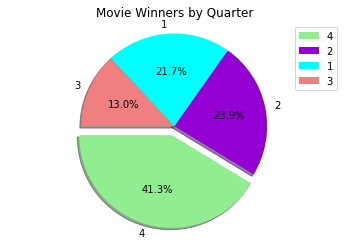

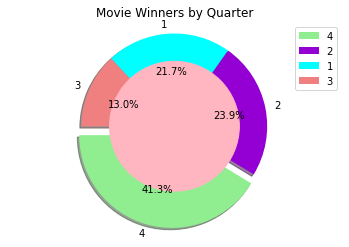

In [20]:
#create pie and donut plot for Winners by Quarter

df1 = Oscar_Release_Date_df2["Quarter_Released"].value_counts().reset_index()
colors = ['lightgreen', 'darkviolet', 'cyan', 'lightcoral']
index = ('Q1', 'Q2', 'Q3', 'Q4')
plt.pie(data=df1,x='Quarter_Released',labels='index', autopct='%.1f%%', explode=(0.1,0,0,0), shadow=True, startangle=180, colors = colors)
plt.axis('equal')
plt.title('Movie Winners by Quarter')
plt.legend()
plt.show()

df1 = Oscar_Release_Date_df2["Quarter_Released"].value_counts().reset_index()
colors = ['lightgreen', 'darkviolet', 'cyan', 'lightcoral']
index = ('Q1', 'Q2', 'Q3', 'Q4')
plt.pie(data=df1,x='Quarter_Released',labels='index', autopct='%.1f%%', explode=(0.1,0,0,0), shadow=True, startangle=180, colors = colors)
plt.axis('equal')
my_circle=plt.Circle( (0,0), 0.7, color='lightpink')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Movie Winners by Quarter')
plt.legend()
plt.show()

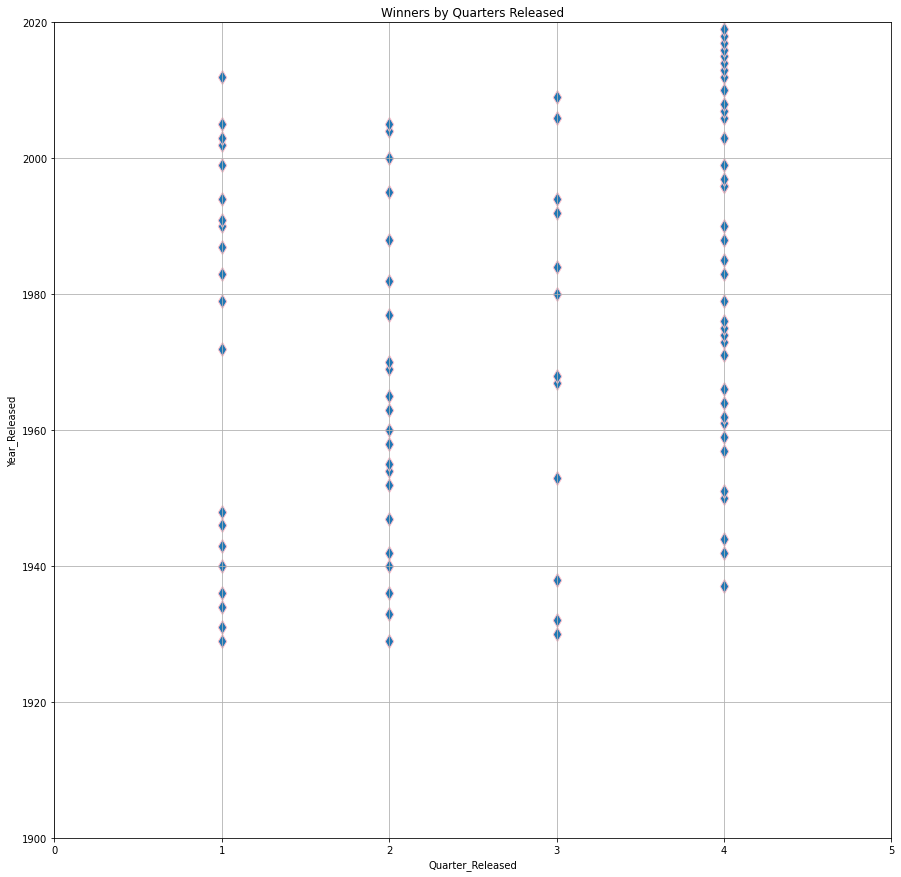

In [42]:
Oscar_Release_Date_df2.plot.scatter(x="Quarter_Released", y="Year_Released", xlim = (0, 5), ylim= (1900, 2020), marker = 'd', edgecolor = "pink", grid = True, s = 100, figsize=(15,15))

plt.title('Winners by Quarters Released')
#plt.savefig("WinnersByQuarters.png")
plt.show()

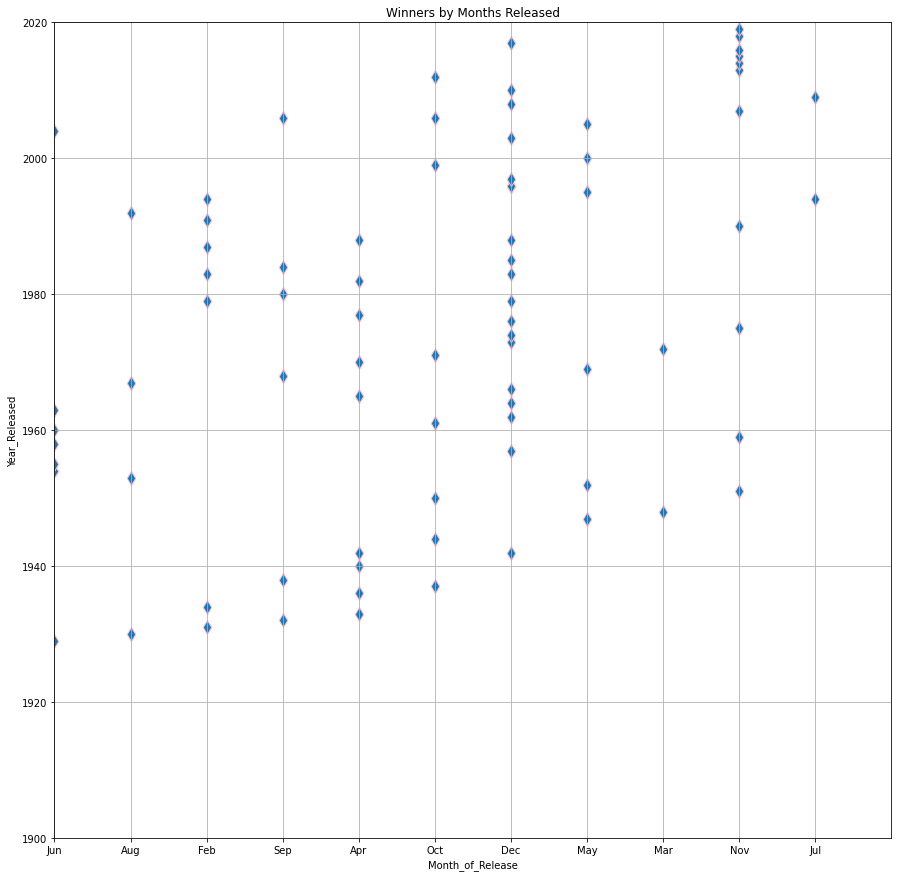

In [39]:
Oscar_Release_Date_df2.plot.scatter(x="Month_of_Release", y="Year_Released", xlim = (1, 12), ylim= (1900, 2020), marker = 'd', edgecolor = "pink", grid = True, s = 100, figsize=(15,15))

plt.title('Winners by Months Released')
#plt.savefig("WinnersByMonths.png")
plt.show()

In [52]:
Oscar_Release_Date_df3 = Oscar_Release_Date_df2['Year_Released'],['Month_of_Release'],['Movie Title']



In [53]:
plot_pandas = Oscar_Release_Date_df3.plot.bar(figsize=(20,15), color= 'c',fontsize = 12)
plt.xlabel("Month_of_Release",fontsize = 12)
plt.ylabel("Year_Released",fontsize = 12)
plt.title("Winners by Months Released",fontsize = 18)

plt.show()
plt.tight_layout()

AttributeError: 'tuple' object has no attribute 'plot'